In [1]:
import sklearn

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing=load_housing_data()



In [3]:
housing.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#categorical feature 
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

***Feel the Data***

In [6]:
# summary of each numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


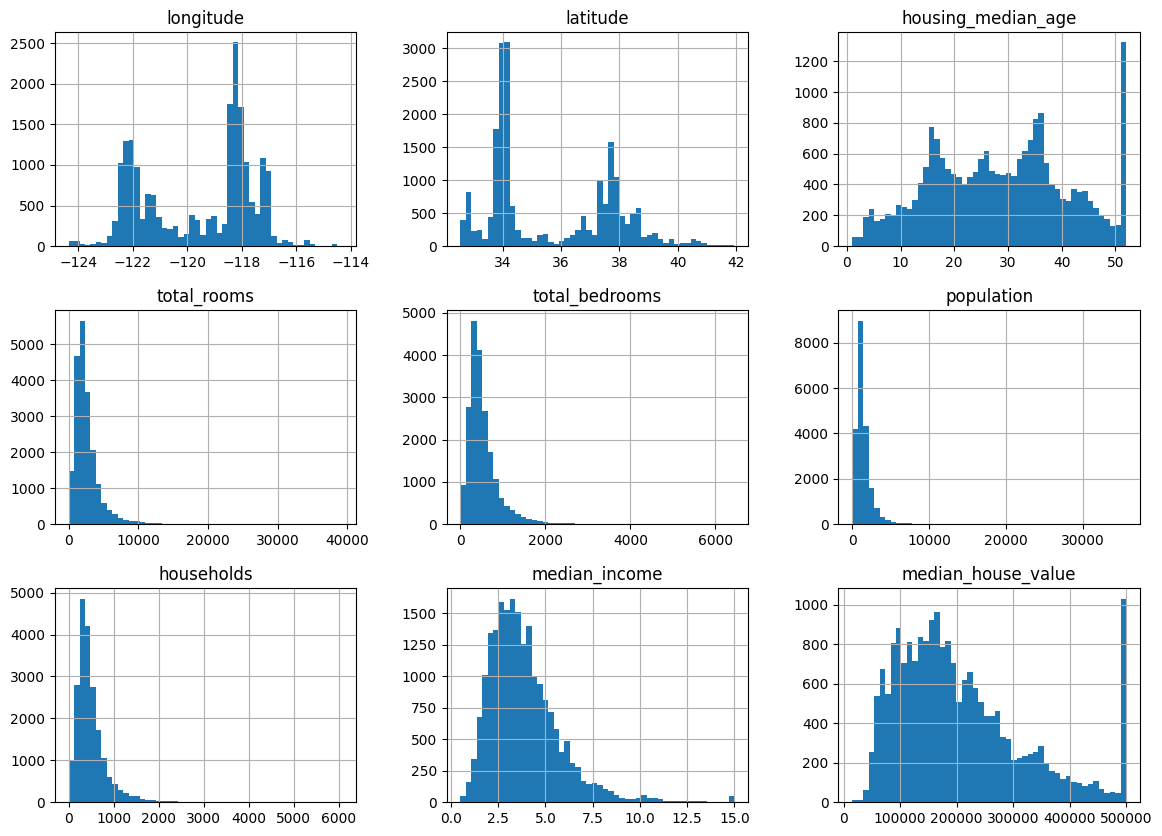

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(14,10)) #bins is used in sorting continuous numerical data into categories.
plt.show()


things i see:

most of the curves are inclined to the left instead of bell shape(tail heavy)

in median_house_value the values above 500000 have been squashed to fit to 500000

SCALES ARE VARIED



In [8]:
#separate test data - CRUCIAL
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices= np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices= shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# permutation creates a copy of the array and shuffles it, shuffle shuffles the array


In [9]:
train_set, test_set= split_train_test(housing, 0.2)

In [10]:
len(train_set)


16512

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
#similar work as our split_train_test with an addon== can set a random seed generator, if we send multiple datasets with identical length it will split at same indices
from sklearn.model_selection import train_test_split

train_set,test_set= train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

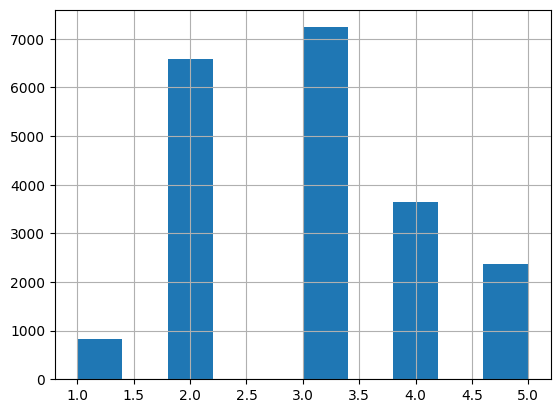

In [16]:
#stratified sampling, sampling such that each category gets represented in the distribution

housing["income_cat"]=pd.cut(housing["median_income"],
bins=[0.,1.5,3.,4.5,6.,np.inf],
labels=[1,2,3,4,5])

housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
#we remove the income_cat attribute as it was just for test
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

**visualizing the data**

In [20]:
housing= strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

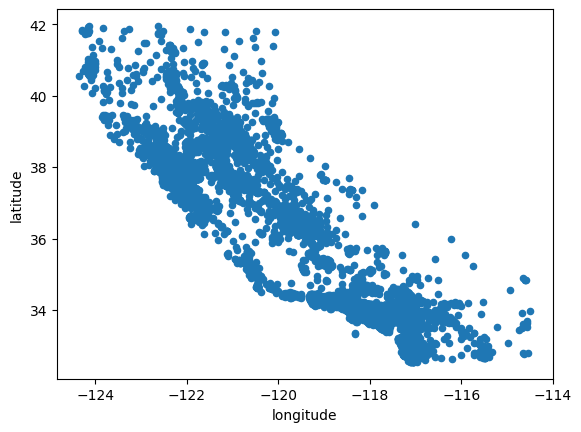

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

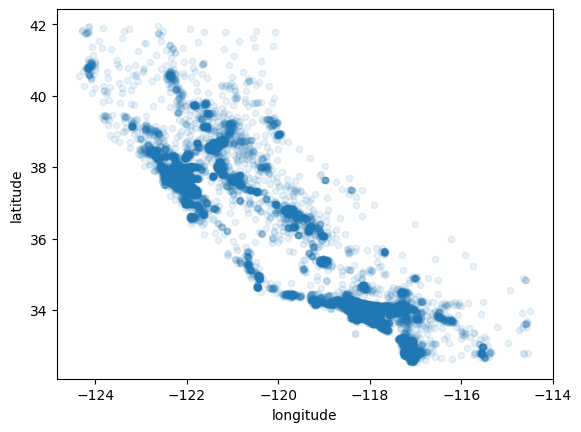

In [22]:
#for better visualization use alpha parameter
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

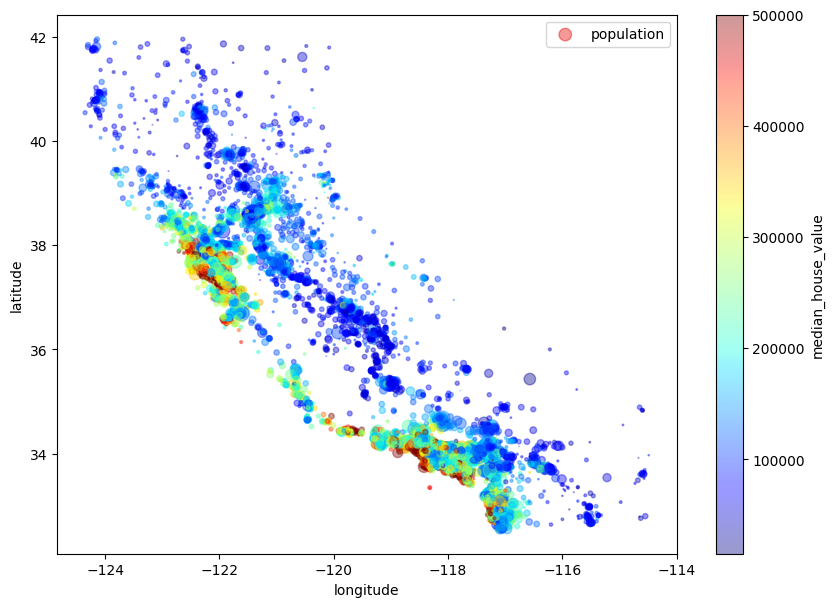

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

**correlation**

Note: since Pandas 2.0.0, the numeric_only argument defaults to False, so we need to set it explicitly to True to avoid an error.



In [24]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

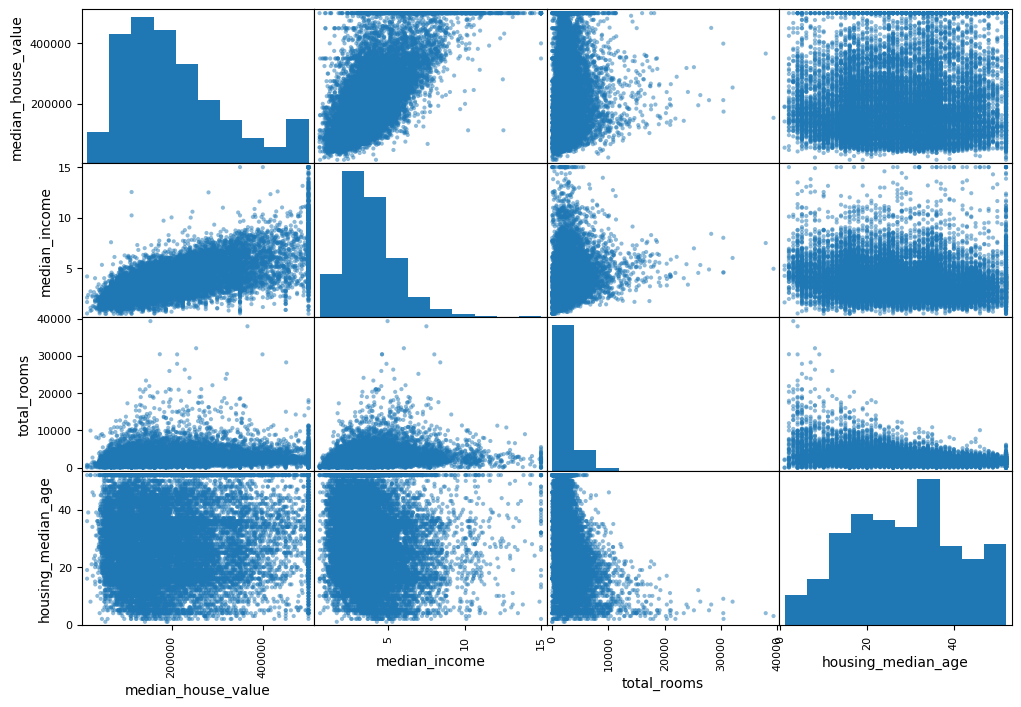

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

**combining attributes**


In [26]:
housing["rooms_per_household"]=(housing["total_rooms"])/housing["households"]
housing["bedrooms_in_rooms"]=(housing["total_bedrooms"])/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing['households']

In [27]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_in_rooms          -0.256397
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**data cleaning**

dropna,drop and fillna

In [29]:
# housing.dropna(subset= ["total_bedrooms"])
# housing["households"].count() #dropna drops all the rows with issues
# housing.drop("total_bedrooms",axis=1)
# median=housing["total_bedrooms"].median()

# housing["total_bedrooms"].fillna(median, inplace=True)


##using sklearn##
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")

In [30]:
housing_num= housing.drop("ocean_proximity",axis=1) #created a copy coz median of numerical only calculated 

imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [31]:
imputer.statistics_ #has all the median values stored


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [32]:
X=imputer.transform(housing_num)

In [33]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

handling text attributes

In [34]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [35]:
# this is a categorical attribute, but ml libs like working with numerical atts.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [36]:
#to get the list of categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

1 issue is that this representation gives unnecessary conclusion to complex ml model that 0 and 1 are more similar than 0 and 4 which is not the case here

In [37]:
# so we use  ONE HOT ENCODING#
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [38]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

OneHotEncoder is just a class, you cant use it directly unless you make an instance with it-- OneHotEncoder() creates an instance and now it can be used.}

In [39]:
#######representation learning?????????
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
df_test= pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY","NEAR OCEAN"]})
pd.get_dummies(df_test)
#for quick testing of one hot encoding


,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,True,False,False
1,False,True,False
2,False,False,True


In [41]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [42]:
cat_encoder.get_feature_names_out()  

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

this is a transformer custom made to add new useful features to the code
// an advantage to make this is that in future datasets, they will be automatically calculated.

why do this? because the more we automate the more hyperparameters we can test and hopefully find a useful one

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X, y=None):
        return self
    def transform(self, X):
        rooms_per_household= X[:, rooms_ix]/X[:, households_ix]
        population_per_household=X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room= X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attribs= attr_adder.transform(housing.values)

**FEATURE SCALING**


MIN MAX SCALING- or normalization is rescaling and shifting-- (value-minv)/(maxv-minv) -- MINMMAXSCALER

|
STANDARDIZATIon- standardscaler-- value- meanv/ std dev


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_added', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),

])
housing_num_tr= num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline= ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared= full_pipeline.fit_transform(housing)

finally **TRAIN A MODEL**

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
some_data= housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
some_data_prepared= full_pipeline.transform(some_data)
print("prediction:", lin_reg.predict(some_data_prepared))

prediction: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]


In [48]:
print("labels:",list(some_labels))

labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [49]:
from sklearn.metrics import mean_squared_error 
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

np.float64(67769.12117461127)

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
housing_predictions= tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels, housing_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

0 error!! means overfit. To check we need a cross validation dataset( which is a subset of the training dataset only). 

**even better we do k- fold cross validation**  which means 10 different folds and the d-tree trains 10 times, cv is different each time

In [52]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores= np.sqrt(-scores)
# notice how we took the negative of scores because rmse is cost function( lower is better) and cv is utility function(higher is better)



In [53]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [54]:
display_scores(tree_rmse_scores)

scores: [68002.37418708 66630.76685774 70892.87203544 73458.42595281
 68977.44638767 68624.45701927 71345.32672994 72266.32430216
 69901.92147456 69766.7354464 ]
mean: 69986.66503930914
standard deviation: 1950.5457997763651


standard deviation tells how precise this estimate is, here that means among the various estimates, how far off are they, the further they are the more it means that the data is either small, noisy or model is unstable... less std means more predicable and more precise.

In [55]:
lin_reg_onkfold= cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores= np.sqrt(-lin_reg_onkfold)
display_scores(lin_reg_rmse_scores)

scores: [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
mean: 67994.06678091262
standard deviation: 1394.9377015503237


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
forest_predictions= forest_reg.predict(housing_prepared)

forest_mse= mean_squared_error(housing_labels, forest_predictions)
forest_rmse= np.sqrt(forest_mse)
print(forest_rmse)

18440.608047529513


In [58]:
forest_onkfold= cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse= np.sqrt(-forest_onkfold)

In [59]:
display_scores(forest_rmse)

scores: [48540.62289778 49730.07573935 47404.55801096 50313.48507637
 48717.03997654 50009.97321029 50398.85810912 51510.45850816
 50320.11107602 49841.16775131]
mean: 49678.6350355908
standard deviation: 1105.3884207853184


In [60]:
#loading and saving the model 
import joblib
joblib.dump(lin_reg, "linearregressiontrained1.pkl")
# and later...
# my_model_loaded = joblib.load("linearregressiontrained1.pkl")

['linearregressiontrained1.pkl']

^ ye hai aam zindagi

In [61]:
model= forest_reg
hyperparams=model.get_params()
cv_scores_raw= forest_onkfold
cv_scores_rmse= forest_rmse
# prediction= model.predict(X)
bundle={
    "model":model,
    "hyperparams":hyperparams,
    "cv_scores_raw": cv_scores_raw,
    "cv_scores_rmse":cv_scores_rmse,
}

joblib.dump(bundle, "forestregressionbundle.pkl")


['forestregressionbundle.pkl']

and here i leave the scope of more models, hoping i come back after learning more about em like svms, ensembles, nns

**FINE_TUNE**


In [62]:
# one way is to fiddle with all the different hyperparams but i know you wont so skip to gridsearchcv
from sklearn.model_selection import GridSearchCV

param_grid= [
    {'n_estimators':[3,10,110], 'max_features':[2,4,6,8]}, #3*4=12 combinations
    {'bootstrap':[False], 'n_estimators': [3,10],'max_features': [2,3,4]}, #2*3=6 combinations
]
forest_reg= RandomForestRegressor()
grid_search= GridSearchCV(forest_reg, param_grid,cv=5, scoring= 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,110


keep a look on the parameter refit if it is true-- once gridsearch cv finds the best hyperparameter it will train the whole training set on that parameter 

When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).

as for the result if we get the max values as best estimator, we try to increase the values

In [63]:
grid_search.best_estimator_

,n_estimators,110
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63411.47095924869 {'max_features': 2, 'n_estimators': 3}
54874.860699573444 {'max_features': 2, 'n_estimators': 10}
51330.631955654 {'max_features': 2, 'n_estimators': 110}
60255.937755356914 {'max_features': 4, 'n_estimators': 3}
52466.809176155046 {'max_features': 4, 'n_estimators': 10}
49396.25809231883 {'max_features': 4, 'n_estimators': 110}
58452.41312264533 {'max_features': 6, 'n_estimators': 3}
51636.083536857805 {'max_features': 6, 'n_estimators': 10}
48831.674059169636 {'max_features': 6, 'n_estimators': 110}
58899.95594207906 {'max_features': 8, 'n_estimators': 3}
52109.907635252064 {'max_features': 8, 'n_estimators': 10}
48971.19267816393 {'max_features': 8, 'n_estimators': 110}
62267.94943448275 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54242.02085848502 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58897.721797232814 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52565.40537944399 {'bootstrap': False, 'max_features': 3, 'n_estima

In [65]:
#     {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}, 
#     {'bootstrap':[False], 'n_estimators': [3,10],'max_features': [2,3,4]},
# tell me little about what these hyperparams are

# Don’t forget that you can treat some of the data preparation steps as
# hyperparameters. For example, the grid search will automatically
# find out whether or not to add a feature you were not sure about
# (e.g., using the add_bedrooms_per_room hyperparameter of your
# CombinedAttributesAdder transformer). It may similarly be used
# to automatically find the best way to handle outliers, missing fea‐
# tures, feature selection, and more.

In [66]:
feature_importance= grid_search.best_estimator_.feature_importances_
feature_importance

array([7.99859684e-02, 7.12554419e-02, 4.09644344e-02, 1.71732499e-02,
       1.60344160e-02, 1.73087087e-02, 1.60581144e-02, 3.22766985e-01,
       5.69043478e-02, 1.10234651e-01, 8.05743577e-02, 1.36319154e-02,
       1.47570801e-01, 1.62431307e-04, 3.30821033e-03, 6.06596661e-03])

In [ ]:
extra_attribs= ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder= 

In [67]:
# REST OR RESTful API is an http based api that follows some conventions, such as using standard http verbs to read update, create, or delete resources(gppd)

In [ ]:
#in production, you might need to regularly update the model so retrain, so automate the boring stuff
# • Collect fresh data regularly and label it (e.g., using human raters).
# • Write a script to train the model and fine-tune the hyperparameters automati‐
# cally. This script could run automatically, for example every day or every week,
# depending on your needs.
# • Write another script that will evaluate both the new model and the previous
# model on the updated test set, and deploy the model to production if the perfor‐
# mance has not decreased (if it did, make sure you investigate why).